see: https://github.com/facebookresearch/segment-anything/blob/main/notebooks/automatic_mask_generator_example.ipynb

see: https://github.com/facebookresearch/segment-anything/blob/main/notebooks/predictor_example.ipynb -> querying segmentation using keypoint or box for more sophisticated segmentation

In [3]:
%pip install git+https://github.com/facebookresearch/segment-anything.git
%pip install torch torchvision opencv-python matplotlib
! wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

  Cloning https://github.com/facebookresearch/segment-anything.git to /private/var/folders/g6/xn7nvvtn4ng5pf9bhxfs7p2m0000gn/T/pip-req-build-z42v9k9v
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /private/var/folders/g6/xn7nvvtn4ng5pf9bhxfs7p2m0000gn/T/pip-req-build-z42v9k9v
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
--2024-07-30 15:14:41--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.32.110.77, 13.32.110.129, 13.32.110.12, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.32.110.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2564550879 (2.4

filename: kodim13.png


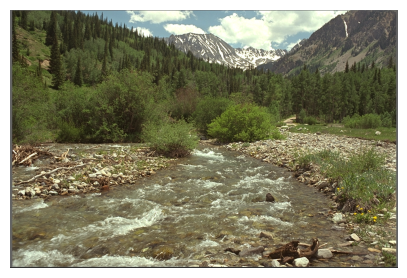

read in image
segmented image
[{'segmentation': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), 'area': 20452, 'bbox': [493, 4, 274, 125], 'predicted_iou': 1.0140706300735474, 'point_coords': [[660.0, 104.0]], 'stability_score': 0.9671350121498108, 'crop_box': [0, 0, 768, 512]}, {'segmentation': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), 'area': 23597, 'bbox': [150, 3, 512, 78], 'predicte

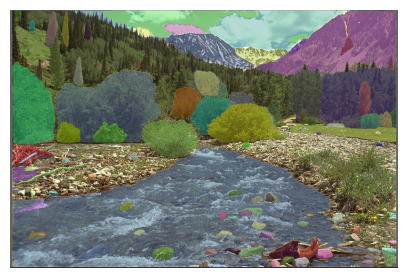

In [9]:
from pathlib import Path
import matplotlib.pyplot as plt
import random
from segment_anything import SamAutomaticMaskGenerator, sam_model_registry, SamPredictor
import numpy as np
import torch
import cv2
import sys
sys.path.append("..")


"""
read in random image
"""

filename =  f'kodim{random.randint(1, 24):02d}.png'
imgpath = Path.cwd().parent / 'data' / 'kodak' / filename
assert imgpath.exists(), f'Image not found at {imgpath}'
image = cv2.imread(str(imgpath))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(f"filename: {filename}")

plt.figure(figsize=(5,5))
plt.imshow(image)
plt.axis('off')
plt.show()

"""
segment
"""

sam_checkpoint = "sam_vit_h_4b8939.pth" # this is the largest model
model_type = "vit_h"
device = "cpu" # "cpu" or "cuda" (not "mps")

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)
masks_generator = SamAutomaticMaskGenerator(model=sam)
# mask_generator_2 = SamAutomaticMaskGenerator( # example for fine-tuning the parameters
#     model=sam,
#     points_per_side=32,
#     pred_iou_thresh=0.86,
#     stability_score_thresh=0.92,
#     crop_n_layers=1,
#     crop_n_points_downscale_factor=2,
#     min_mask_region_area=100,  # Requires open-cv to run post-processing
# )
masks = masks_generator.generate(image)

def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

plt.figure(figsize=(5,5))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show()
